In [1]:
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import nbformat as nbf
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns
pio.renderers.default = "browser"

In [2]:
df_completo = pd.read_csv("../data/brain_tumor_dataset2.csv")[["SEIZURE","VOMITING","HEADACHE","HEAD_GROWTH","MOTOR_MOVE","HEARING_IMPAIR","MENTAL_STATUS","MEMORY_LOSS","HYPER_TENSION","VISUAL_STATUS","BEHAVIOUR_CHANGE","SENSORY_CHANGE","DIABETES","ASTHMA_HISTORY","FAMILY_CANCER_HISTORY","FAM_BT_HISTORY","SMOK_HISTORY","WALKING_CHANGE","ALCOHOL_HISTORY"]]
df = df_completo.copy()
df.dropna(inplace=True)
for col in df.columns:
    df.drop(df[df[col] == "Ukwn"].index, inplace=True)
df_completo

,SEIZURE,VOMITING,HEADACHE,HEAD_GROWTH,MOTOR_MOVE,HEARING_IMPAIR,MENTAL_STATUS,MEMORY_LOSS,HYPER_TENSION,VISUAL_STATUS,BEHAVIOUR_CHANGE,SENSORY_CHANGE,DIABETES,ASTHMA_HISTORY,FAMILY_CANCER_HISTORY,FAM_BT_HISTORY,SMOK_HISTORY,WALKING_CHANGE,ALCOHOL_HISTORY
0,NaN,Yes,NaN,Yes,NaN,Yes,NaN,Yes,Yes,NaN,Yes,NaN,Yes,NaN,NaN,NaN,Yes,Yes,NaN
1,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No
2,NaN,Yes,Yes,Yes,NaN,Yes,NaN,Yes,Yes,NaN,Yes,NaN,Yes,No,NaN,NaN,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No
4,Yes,Yes,Yes,Yes,NaN,Yes,NaN,Yes,Yes,NaN,Yes,NaN,Yes,NaN,NaN,NaN,Yes,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No
8252,Yes,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,Yes,Yes,No
8253,No,No,Yes,No,Yes,No,No,No,No,No,No,Yes,No,No,No,No,Yes,Yes,No
8254,No,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No


In [3]:
df

,SEIZURE,VOMITING,HEADACHE,HEAD_GROWTH,MOTOR_MOVE,HEARING_IMPAIR,MENTAL_STATUS,MEMORY_LOSS,HYPER_TENSION,VISUAL_STATUS,BEHAVIOUR_CHANGE,SENSORY_CHANGE,DIABETES,ASTHMA_HISTORY,FAMILY_CANCER_HISTORY,FAM_BT_HISTORY,SMOK_HISTORY,WALKING_CHANGE,ALCOHOL_HISTORY
1,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No
11,No,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No
12,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No
13,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8250,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No
8251,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No
8252,Yes,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,Yes,Yes,No
8253,No,No,Yes,No,Yes,No,No,No,No,No,No,Yes,No,No,No,No,Yes,Yes,No


In [4]:
def f_rel(df, col):
    return df[col].value_counts(normalize=True).reset_index().rename(columns={"index": col, col: "relative_frequency"})

In [5]:
list_f_rel_completo = []
for col in df_completo.columns:
    rel_df = f_rel(df_completo,col)
    list_f_rel_completo.append((
        col, 
        rel_df[rel_df["relative_frequency"]=="Yes"]["proportion"].values[0], 
        rel_df[rel_df["relative_frequency"]=="No"]["proportion"].values[0] if "No" in rel_df["relative_frequency"].values else 0
        ))
list_f_rel_completo.sort(key=lambda x: x[1], reverse=True)
list_f_rel_completo


[('SMOK_HISTORY', np.float64(1.0), 0),
 ('WALKING_CHANGE', np.float64(1.0), 0),
 ('SEIZURE', np.float64(0.6196319018404908), np.float64(0.3619631901840491)),
 ('VOMITING', np.float64(0.5), np.float64(0.5)),
 ('HEAD_GROWTH', np.float64(0.5), np.float64(0.5)),
 ('HEARING_IMPAIR', np.float64(0.5), np.float64(0.5)),
 ('MEMORY_LOSS', np.float64(0.5), np.float64(0.5)),
 ('HYPER_TENSION', np.float64(0.5), np.float64(0.5)),
 ('BEHAVIOUR_CHANGE', np.float64(0.5), np.float64(0.5)),
 ('DIABETES', np.float64(0.5), np.float64(0.5)),
 ('HEADACHE', np.float64(0.3594080338266385), np.float64(0.6236786469344608)),
 ('FAMILY_CANCER_HISTORY',
  np.float64(0.3076923076923077),
  np.float64(0.48951048951048953)),
 ('MENTAL_STATUS',
  np.float64(0.24152542372881355),
  np.float64(0.7309322033898306)),
 ('MOTOR_MOVE',
  np.float64(0.23554603854389722),
  np.float64(0.7430406852248393)),
 ('SENSORY_CHANGE',
  np.float64(0.15450643776824036),
  np.float64(0.8197424892703863)),
 ('VISUAL_STATUS',
  np.float64(0

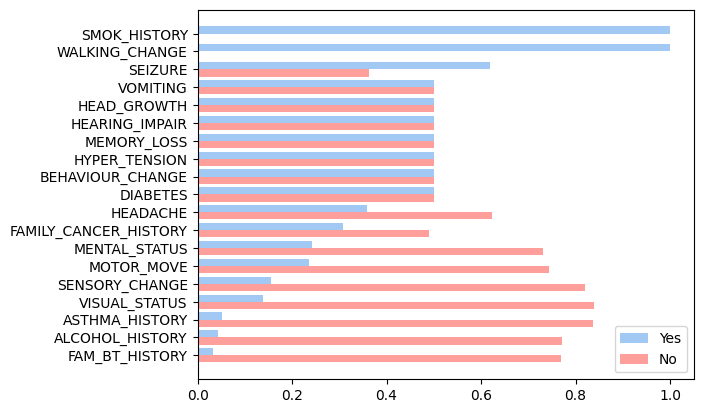

In [6]:
# Grafico a barre orizzontali con plt

sns.set_color_codes("pastel")
yes = [x[1] for x in reversed(list_f_rel_completo)]
no = [x[2] for x in reversed(list_f_rel_completo)]
labels = [x[0] for x in reversed(list_f_rel_completo)]

y = np.arange(len(labels))
height = 0.4

plt.barh(y + height/2, yes, height=height, color='b', label='Yes')
plt.barh(y - height/2, no,  height=height, color='r', label='No')

plt.yticks(y, labels)
plt.legend()

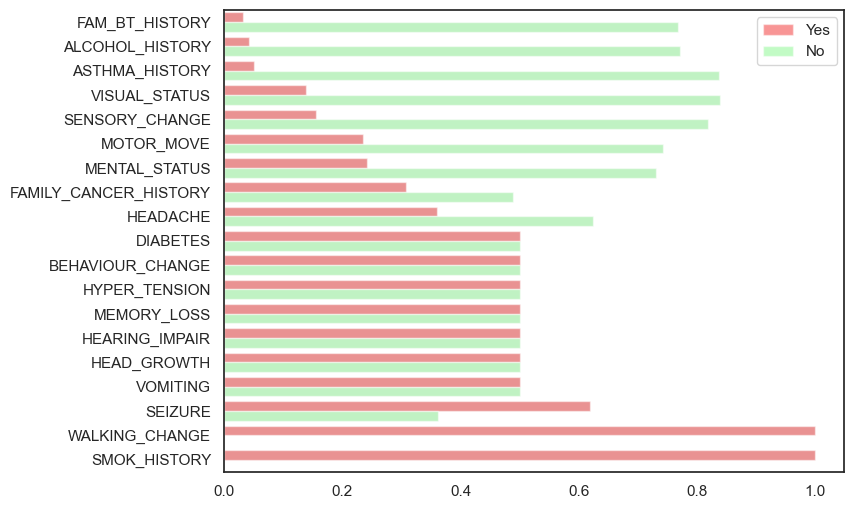

In [7]:
# Grafico a barre orizzontali con seaborn

yes = [x[1] for x in reversed(list_f_rel_completo)]
no  = [x[2] for x in reversed(list_f_rel_completo)]
labels = [x[0] for x in reversed(list_f_rel_completo)]

df_bar = pd.DataFrame({
    'label': labels,
    'Yes': yes,
    'No': no
})

# Converto in formato "long" per Seaborn
df_long = df_bar.melt(id_vars='label', var_name='response', value_name='value')

plt.figure(figsize=(8, 6))
sns.set_theme(style="white")

# Palette personalizzata: Yes = rosso pastello, No = verde pastello
custom_palette = {
    "Yes": "#f1090939",  # rosso pastello
    "No":  "#72f67939"   # verde pastello
}

ax = sns.barplot(
    data=df_long,
    y="label",
    x="value",
    hue="response",
    orient="h",
    palette=custom_palette
)

# Imposto alpha sulle barre
for bars in ax.containers:
    for bar in bars:
        bar.set_alpha(0.5)

ax.legend_.remove()

# Creo la legenda manuale con alpha corretto
handles = [
    Patch(facecolor="#f10909", alpha=0.43, label="Yes"),
    Patch(facecolor="#72f679", alpha=0.43, label="No")
]
ax.legend(handles=handles, title="")

# plt.legend(title="")
plt.xlabel("")
plt.ylabel("")
plt.show()




In [8]:
# scatterpolar senza Nan e Ukwn

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
    name="Symptoms",
    r = [x[1] * 100 for x in list_f_rel_completo],   # usa percentuali invece di int()
    theta = [x[0] for x in list_f_rel_completo],
    fill = "toself",
    fillcolor = "rgba(143, 157, 227,.3)",
    line = dict(color="rgba(143, 157, 227,.7)")
))

fig.update_layout(
    showlegend = True,
    polar = dict(
      bgcolor = "white",
      angularaxis = dict(
        linewidth = 2,
        showline=True,
        linecolor='lightgrey',
        gridcolor='lightgrey',
      ),
      radialaxis = dict(
        side = "counterclockwise",
        showline = False,
        linewidth = 2,
        gridcolor = "lightgrey",
        gridwidth = 2,
        range=[0,100],
        ticksuffix="%",
      )
    ),
    paper_bgcolor = "white"
)

fig.write_html("grafico_completo.html")

In [9]:
list_f_rel = []
for col in df.columns:
    rel_df = f_rel(df,col)
    list_f_rel.append((
        col, 
        rel_df[rel_df["relative_frequency"]=="Yes"]["proportion"].values[0], 
        rel_df[rel_df["relative_frequency"]=="No"]["proportion"].values[0] if "No" in rel_df["relative_frequency"].values else 0
        ))
list_f_rel.sort(key=lambda x: x[1], reverse=True)


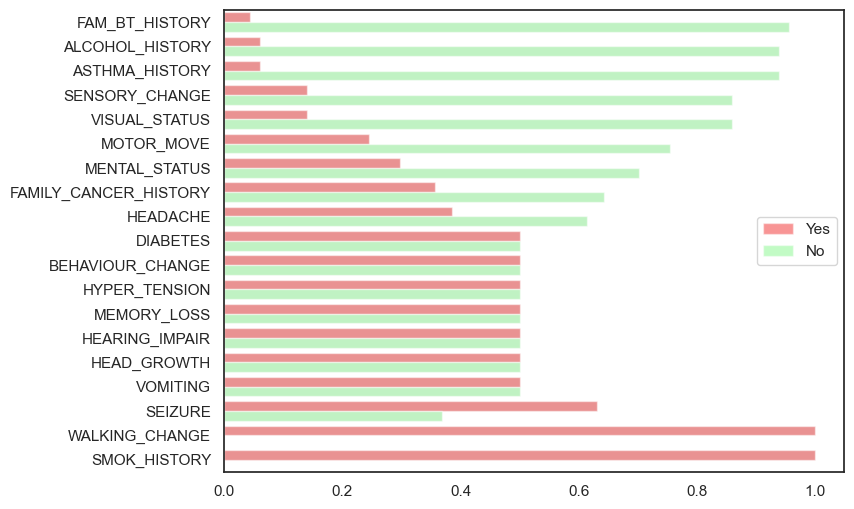

In [10]:
# Grafico a barre orizzontali con seaborn

yes = [x[1] for x in reversed(list_f_rel)]
no  = [x[2] for x in reversed(list_f_rel)]
labels = [x[0] for x in reversed(list_f_rel)]

df_bar = pd.DataFrame({
    'label': labels,
    'Yes': yes,
    'No': no
})

# Converto in formato "long" per Seaborn
df_long = df_bar.melt(id_vars='label', var_name='response', value_name='value')

plt.figure(figsize=(8, 6))
sns.set_theme(style="white")

# Palette personalizzata: Yes = rosso pastello, No = verde pastello
custom_palette = {
    "Yes": "#f1090939",  # rosso pastello
    "No":  "#72f67939"   # verde pastello
}

ax = sns.barplot(
    data=df_long,
    y="label",
    x="value",
    hue="response",
    orient="h",
    palette=custom_palette
)

# Imposto alpha sulle barre
for bars in ax.containers:
    for bar in bars:
        bar.set_alpha(0.5)

ax.legend_.remove()

# Creo la legenda manuale con alpha corretto
handles = [
    Patch(facecolor="#f10909", alpha=0.43, label="Yes"),
    Patch(facecolor="#72f679", alpha=0.43, label="No")
]
ax.legend(handles=handles, title="")

# plt.legend(title="")
plt.xlabel("")
plt.ylabel("")
plt.show()

In [11]:
# scatterpolar senza Nan e Ukwn

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
    name="Symptoms",
    r = [x[1] * 100 for x in list_f_rel],   # usa percentuali invece di int()
    theta = [x[0] for x in list_f_rel],
    fill = "toself",
    fillcolor = "rgba(143, 157, 227,.3)",
    line = dict(color="rgba(143, 157, 227,.7)")
))

fig.update_layout(
    showlegend = True,
    polar = dict(
      bgcolor = "white",
      angularaxis = dict(
        linewidth = 2,
        showline=True,
        linecolor='lightgrey',
        gridcolor='lightgrey',
      ),
      radialaxis = dict(
        side = "counterclockwise",
        showline = False,
        linewidth = 2,
        gridcolor = "lightgrey",
        gridwidth = 2,
        range=[0,100],
        ticksuffix="%",
      )
    ),
    paper_bgcolor = "white"
)

fig.write_html("grafico.html")

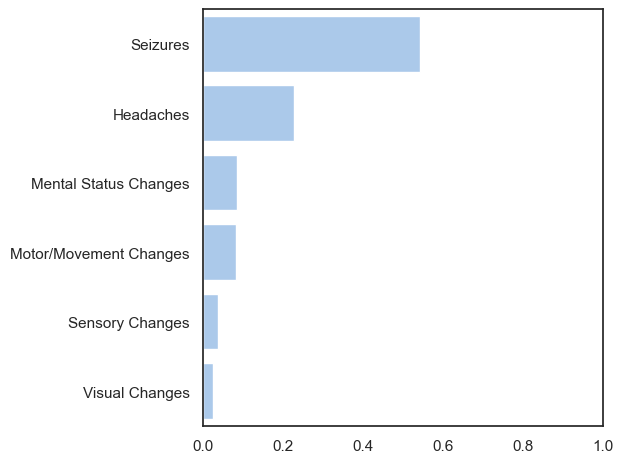

In [12]:
df = pd.read_csv("../data/brain_tumor_dataset2.csv")[["FIRST_SYMPTOM"]]
serie = df.value_counts(normalize=True)
serie.sort_values(inplace=True, ascending=False)
sns.set_color_codes("pastel")
sns.barplot(x= serie.values, y= [x[0] for x in list(serie.index)], orient='h', color="b")
plt.xlabel('')
plt.ylabel('')
plt.xlim(0, 1.0)
plt.tight_layout()
plt.show()

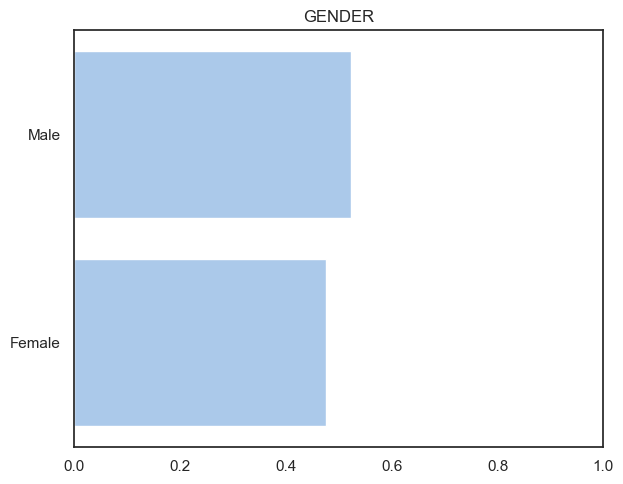

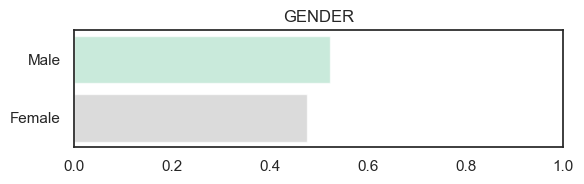

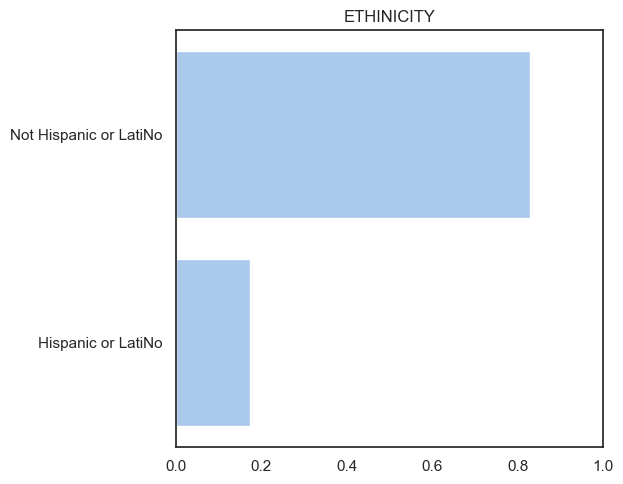

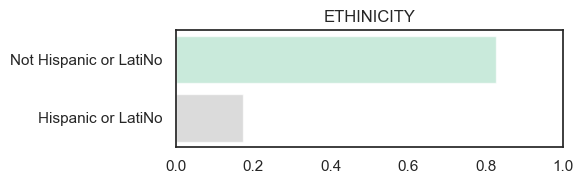

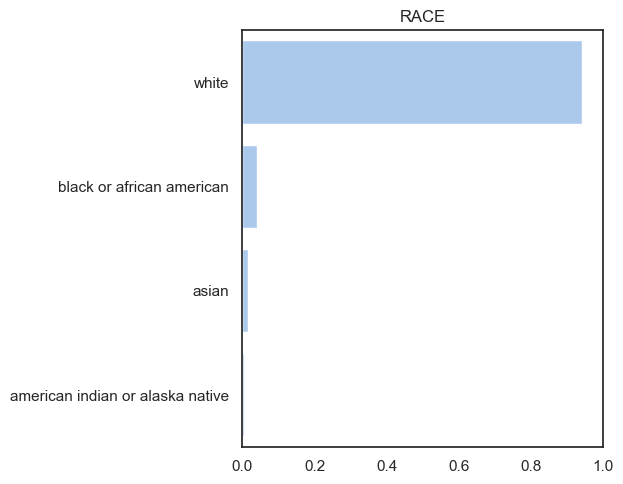

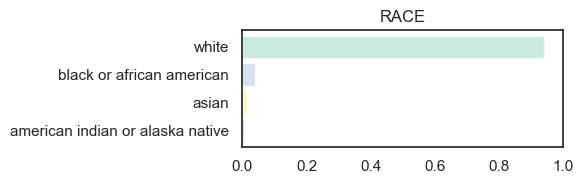

In [16]:
df = pd.read_csv("../data/brain_tumor_dataset2.csv")[["GENDER","ETHINICITY","RACE"]]
df = df[df["RACE"] != "Not reported"]

for col in df.columns:
    serie = df[col].value_counts(normalize=True)
    serie.sort_values(inplace=True, ascending=False)
    sns.set_color_codes("pastel")
    sns.barplot(x= serie.values, y= [x for x in list(serie.index)], orient='h', color="b")
    plt.xlabel('')
    plt.ylabel('')
    plt.xlim(0, 1.0)
    plt.tight_layout()
    plt.title(col)
    plt.show()

    # Matplotlib equivalente al grafico seaborn precedente
    fig, ax = plt.subplots(figsize=(6, max(2, 0.35 * len(serie))))
    labels = list(serie.index)
    values = list(serie.values)
    y_pos = np.arange(len(labels))

    # palette pastel
    cmap = plt.get_cmap("Pastel2")
    colors = [cmap(i / max(1, len(labels) - 1)) for i in range(len(labels))]

    bars = ax.barh(y_pos, values, color=colors, alpha=0.7)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.invert_yaxis()  # mantengo ordine simile a seaborn
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xlim(0, 1.0)
    ax.set_title(col)
    plt.tight_layout()

    # # Annotazioni percentuali a destra delle barre
    # for bar, val in zip(bars, values):
    #     ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
    #             f"{val:.1%}", va="center", fontsize=9)

    plt.show()

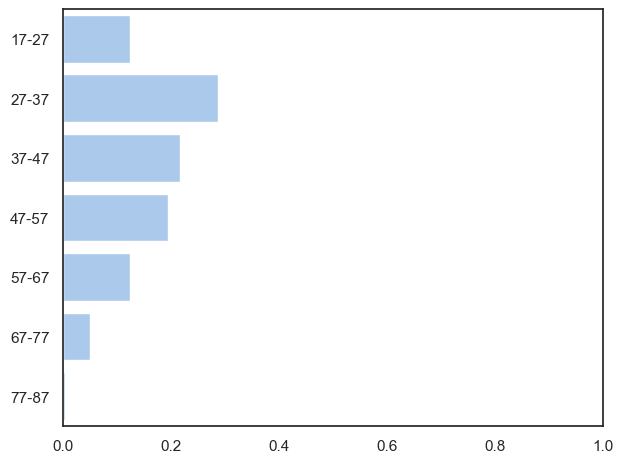

In [17]:
df = pd.read_csv("../data/brain_tumor_dataset2.csv")[["AGE"]]

max_age = df["AGE"].max()
min_age = df["AGE"].min()

# print(f"Max age: {max_age}")
# print(f"Min age: {min_age}")  

range_df = df["AGE"].value_counts(bins=7, normalize=True).sort_index()
#print(range_df)
range_df.index = [f"{int(np.ceil(iv.left))}-{int(iv.right)}" for iv in range_df.index]
sns.set_color_codes("pastel")
sns.barplot(x= range_df.values, y= [str(x) for x in range_df.index], orient='h', color="b")
plt.xlabel('')  
plt.ylabel('')
plt.xlim(0, 1.0)
plt.tight_layout()
plt.show()

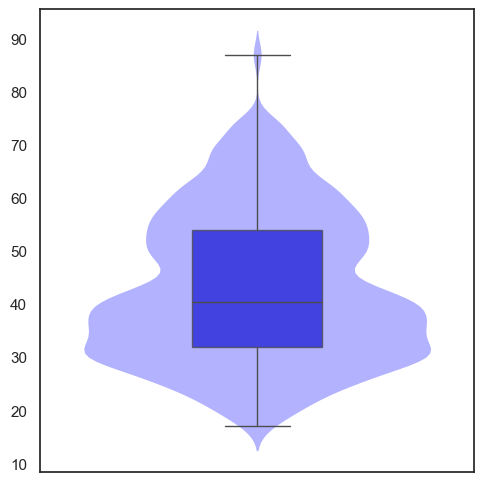

In [15]:
col = "AGE"
color = 'blue'

fig, ax = plt.subplots(1, 1, figsize=(5, 5)) 

vp = sns.violinplot(data=df[col], color=color,
                    inner=None, linewidth=0, saturation=1, ax=ax)

for patch in vp.collections:
    patch.set_alpha(0.3)  

bp = sns.boxplot(data=df[col], color=color, width=0.3,
                    boxprops={'zorder': 2}, saturation=0.7, ax=ax)

for patch in bp.patches:
    patch.set_alpha(0.8)

ax.set_ylabel('')   

plt.tight_layout()
plt.show()